#✅ Practical: Train an LSTM Model for Financial Data Prediction (Synthetic)

#🎯 Objective:

Use synthetic time-series financial data (like stock prices) and train an LSTM model to predict future values.

#🪛 Step-by-Step Implementation

#🧩 Step 1: Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


#🧠 Step 2: Generate Synthetic Financial Data

We simulate a sine wave + noise to mimic financial stock price patterns.

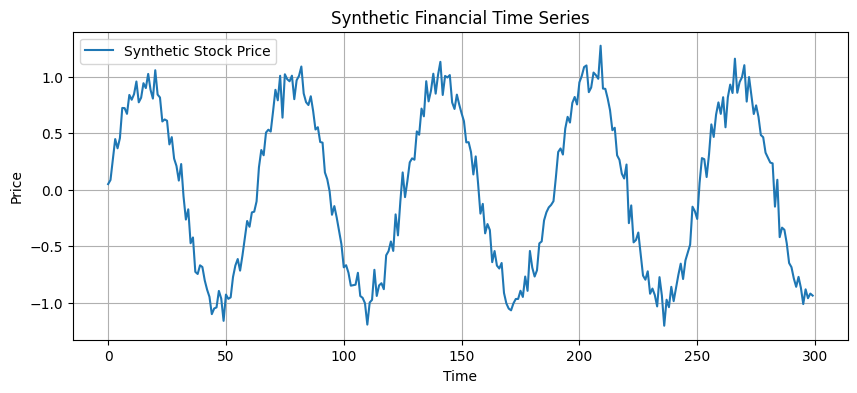

In [2]:
# Generate synthetic stock-like data
np.random.seed(42)
time_steps = 300
x = np.arange(time_steps)
synthetic_price = np.sin(0.1 * x) + np.random.normal(scale=0.1, size=time_steps)

# Plot the data
plt.figure(figsize=(10, 4))
plt.plot(x, synthetic_price, label="Synthetic Stock Price")
plt.title("Synthetic Financial Time Series")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


#🧹 Step 3: Prepare Data for LSTM
Convert the time series into a supervised learning format using a sliding window.




In [8]:
# Normalize data
# Initializes a MinMaxScaler, which scales features to a given range (default is 0 to 1).
scaler = MinMaxScaler()
# Fits the scaler to the synthetic_price data and transforms it.
# The data is reshaped to (-1, 1) because the scaler expects a 2D array (samples, features).
scaled_data = scaler.fit_transform(synthetic_price.reshape(-1, 1))

# Create sequences
# Defines a function to create sequences (X) and corresponding target values (y)
# from the time series data for use in a recurrent neural network.
def create_dataset(data, window_size=10):
    X, y = [], []
    # Iterates through the data to create sequences.
    # Each sequence (X) is 'window_size' long, and the target (y) is the next data point.
    for i in range(len(data) - window_size):
        X.append(data[i:i+window_size])
        y.append(data[i+window_size])
    # Converts the lists of sequences and targets into NumPy arrays.
    return np.array(X), np.array(y)

# Prepare sequences
# Sets the size of the historical window to consider for each prediction.
window_size = 10
# Calls the create_dataset function to generate the sequences (X) and targets (y)
# from the normalized data.
X, y = create_dataset(scaled_data, window_size)

# Reshape input to [samples, time_steps, features]
# Reshapes the input data X to the format expected by LSTM layers in Keras:
# 'samples' is the number of sequences, 'time_steps' is the window_size,
# and 'features' is 1 because we have a single feature (price).
X = X.reshape((X.shape[0], X.shape[1], 1))

# Train-test split
# Calculates the index for splitting the data into training and testing sets (80% train, 20% test).
split = int(len(X) * 0.8)
# Splits the input features (X) and target values (y) into training and testing sets.
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

#🏗️ Step 4: Build the LSTM Model

In [4]:
model = Sequential([
    LSTM(50, activation='relu', input_shape=(window_size, 1)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

#🚀 Step 5: Train the Model

In [5]:
history = model.fit(X_train, y_train, epochs=30, batch_size=16, validation_data=(X_test, y_test), verbose=1)


Epoch 1/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.3472 - val_loss: 0.2484
Epoch 2/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2280 - val_loss: 0.0995
Epoch 3/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0514 - val_loss: 0.0383
Epoch 4/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0334 - val_loss: 0.0285
Epoch 5/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0275 - val_loss: 0.0236
Epoch 6/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0222 - val_loss: 0.0224
Epoch 7/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0201 - val_loss: 0.0223
Epoch 8/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0214 - val_loss: 0.0234
Epoch 9/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0181 - val_loss: 0.0182
Epoch 10/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0164 - val_loss: 0.0160
Epoch 11/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0127 - val_loss: 0.0151
Epoch 12/30
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0

#📊 Step 6: Evaluate and Visualize the Predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step


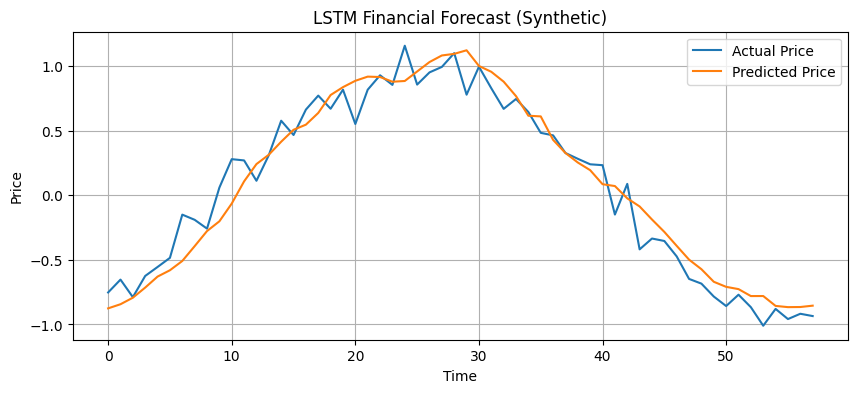

In [6]:
# Predict
predicted = model.predict(X_test)

# Inverse transform
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

# Plot
plt.figure(figsize=(10, 4))
plt.plot(actual_prices, label="Actual Price")
plt.plot(predicted_prices, label="Predicted Price")
plt.title("LSTM Financial Forecast (Synthetic)")
plt.xlabel("Time")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()


#📌 Step 7: Predict Future Value

In [7]:
# Take last input window and predict next value
last_window = scaled_data[-window_size:].reshape(1, window_size, 1)
next_price_scaled = model.predict(last_window)
next_price = scaler.inverse_transform(next_price_scaled)
print(f"📈 Next predicted price: {next_price[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
📈 Next predicted price: -0.86


#✅ Summary:
Created synthetic financial data that mimics price movement.

Preprocessed data using a sliding window.

Trained a basic LSTM model to predict future price.

Evaluated visually how well the model predicts the signal.